In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('D:\ML\data\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
label_encoder = LabelEncoder()

In [5]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])


In [6]:
df.shape

(1338, 7)

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [8]:
X=df[['age','sex','bmi','children','smoker','charges']]
Y=df[['region']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=12)

In [10]:
X_train.head()

,age,sex,bmi,children,smoker,charges
646,39,1,26.220,1,0,6123.56880
852,46,0,35.530,0,1,42111.66470
1081,32,1,27.835,1,0,4454.40265
322,34,1,30.800,0,1,35491.64000
368,44,1,32.015,2,0,8116.26885


In [11]:
X_train.shape

(936, 6)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[-0.00557145,  0.97467943, -0.75363727, -0.07947937, -0.52625475,
        -0.60279268],
       [ 0.48772736, -1.02597835,  0.77662592, -0.9248509 ,  1.90022037,
         2.31644867],
       [-0.49887026,  0.97467943, -0.48818345, -0.07947937, -0.52625475,
        -0.73819019],
       ...,
       [-1.48546788,  0.97467943, -0.12739637, -0.07947937, -0.52625475,
        -0.95996766],
       [ 1.75621002,  0.97467943, -1.15798178, -0.9248509 ,  1.90022037,
         1.08467695],
       [-0.49887026, -1.02597835, -0.17588484, -0.9248509 , -0.52625475,
        -0.74608765]])

In [14]:
X_train.shape

(936, 6)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
knn.fit(X_train,y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [17]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.2860696517412935

In [18]:
scores = []

for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWa

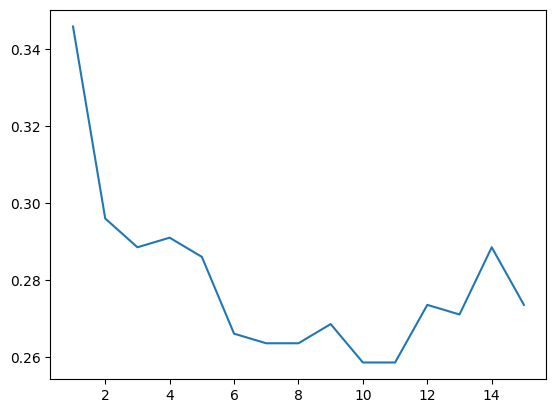

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
c_m=confusion_matrix(y_test,y_pred)

In [22]:
c_m

array([[38, 36, 16, 14],
       [32, 28, 22, 15],
       [29, 30, 33, 13],
       [27, 29, 29, 11]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   northeast       0.30      0.37      0.33       104
   northwest       0.23      0.29      0.25        97
   southeast       0.33      0.31      0.32       105
   southwest       0.21      0.11      0.15        96

    accuracy                           0.27       402
   macro avg       0.27      0.27      0.26       402
weighted avg       0.27      0.27      0.27       402

